In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('fitness_class_2212.csv')
df.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [5]:
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [6]:
df = df.drop('booking_id', axis=1)
df.head(5)

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


# **Exploratory Data Analysis**

- Let's check the unique value in each columns

In [7]:
df['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

- We see that this include days mentioned resulting it as Object type. Let's fix it

In [8]:
df['days_before']=df['days_before'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
df['days_before'].value_counts().index.sort_values()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 29], dtype='int64', name='days_before')

- Day of Week column has some missing values. Let's handle them

In [10]:
# replacing null values of weight with its mean value

mean_weight = df['weight'].mean()
df['weight'].fillna (mean_weight, inplace=True)

In [11]:
df.isnull().sum()

months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [12]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

- Category column has a missing category shows as '-'. Let's handle it.

In [13]:
cat_count = df['category'].value_counts()
cat_count

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: count, dtype: int64

In [14]:
# replacing null values with most occured category

df['category'].replace('-', 'HIIT', inplace=True)

In [15]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'Aqua'], dtype=object)

In [16]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

- Day of Week has some unformated values lets format them by just taking first 3 characters

In [17]:
df['day_of_week'] = df['day_of_week'].str[:3]

In [18]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


**Summary**
- The DataFrame contains a total of 1500 rows and 8 columns, representing various attributes
- The DataFrame contains a mix of integer, float, and object data types
- Some columns needed further preprocessing to handle missing values and convert object data to more suitable types for analysis. Details as below:

Details about the data

- months_as_member: matches the description.
- days_before: This include 'days' mentioned along with numbers resulting it as Object type instead of mentioned one for Numeric. I fixed it by removing the days.
- day_of_week: day of week is object type, not as Numeric mentioned in description. Further, few anomalies were found.I corrected that & changed it to Numeric.
- time : matches the description.
- category : Category had value as "-", which was replaced with "Unknown".
- attended : matches the description.
- weight : This had 20 missing values, which were replaced with overall mean.

No duplicate values found.

Descriptive statistics of data:

- Months as Member: On average, members have been associated for around 15.63 months. However, there is quite a variation in this figure, indicated by the standard deviation of 12.93. Notably, there seems to be an outlier with a maximum value of 148 months, which might require further investigation.

- Weight Distribution: The average weight of the members is about 82.61 units. The spread of weight values is moderate, with a standard deviation of 12.68. The weight values appear to follow a typical distribution, with most falling between 73.56 and 89.38 units.

- Days Before: The average lead time for bookings is approximately 8.35 days before the event. The distribution of this variable leans towards the positive side, as the mean is greater than the median (9.00).

- Attended: The attendance feature is binary, indicating whether an event was attended (0 for not attended, 1 for attended). On average, about 30% of events were attended, which provides insight into the overall attendance rate.

**Visualizations**

Below are two common exploratory data analysis (EDA) methods along with the types of questions they can help answer.

**1. Histograms and Box Plots:**
- Objective: Explore the Distribution of a Numerical Variable

Explanation:
Histograms and box plots are useful for understanding the distribution of a numerical variable. They help answer questions like:

- What is the range of values for a particular variable?
- Are there outliers in the data?
- Is the distribution skewed or symmetric?
Interpretation:

For histograms, a peak or spike may indicate a common range of values, and the spread of the bars gives an idea of variability.
In a box plot, the box represents the interquartile range (IQR), the line inside the box is the median, and whiskers show the spread. Outliers beyond the whiskers might be visible.

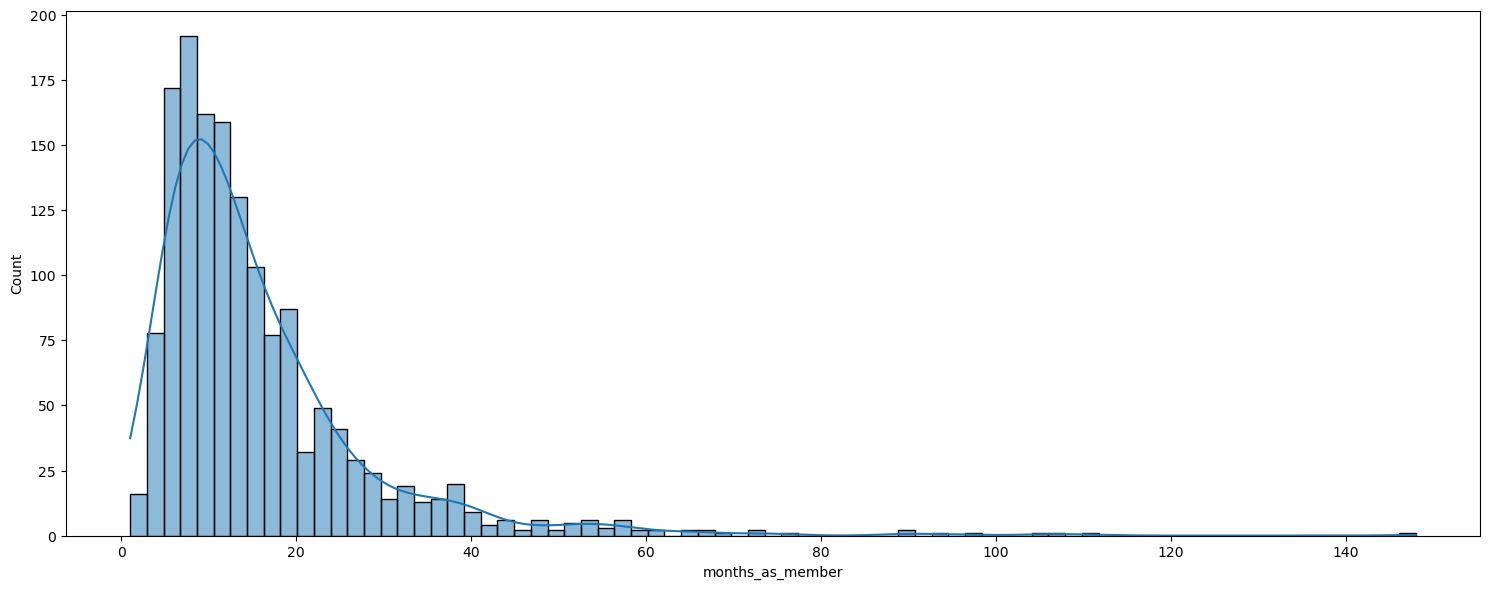

In [19]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='months_as_member',kde=True)
plt.tight_layout()

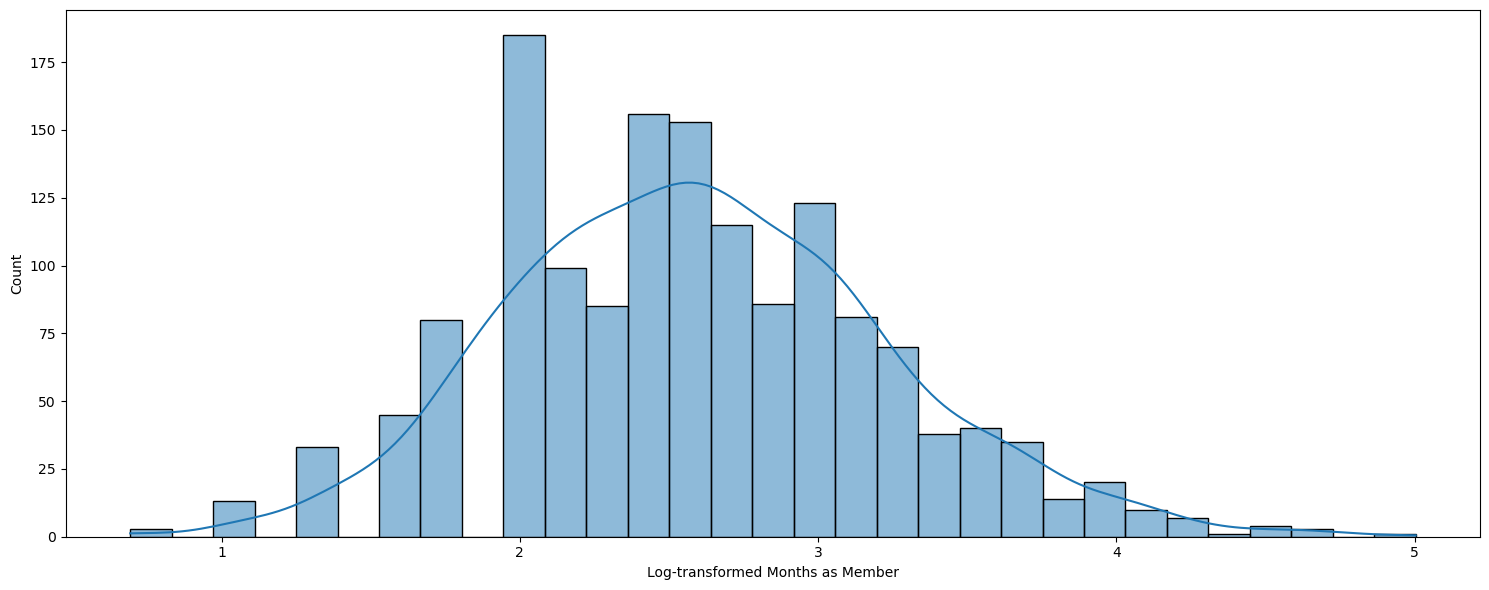

In [20]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x=np.log1p(df['months_as_member']), kde=True)
plt.xlabel('Log-transformed Months as Member')
plt.tight_layout()
plt.show()

Data for months_as_member is not uniformally distributed first, so we apply log transformation on column now it is disributed normally above graph shows this.

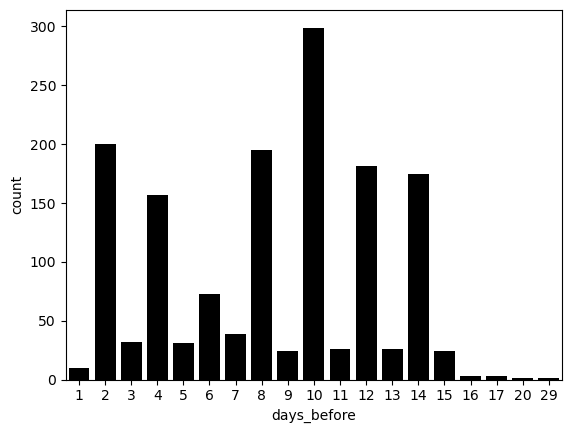

In [21]:
sns.countplot(df, x = 'days_before', color='black');

Above graph shows Most of the people are those in dataset who joined fitness club 10 days before 

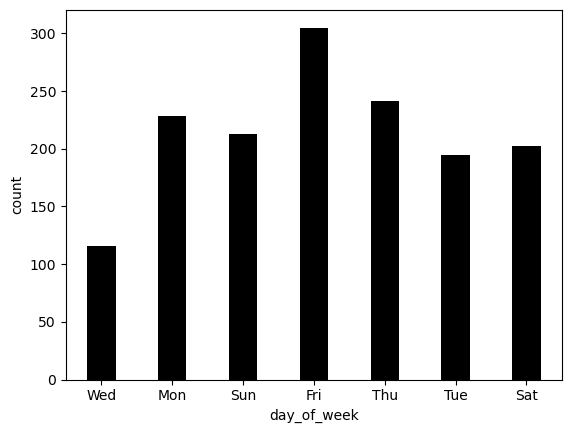

In [22]:
sns.countplot(df, x = 'day_of_week',width=0.4, color ='black');

Count of club members are taking classes is higher on friday

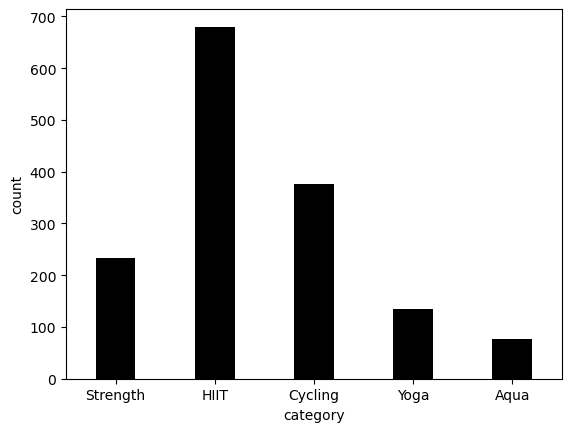

In [23]:
sns.countplot(df, x = 'category',width=0.4, color = 'black');

Categories are based on type of exercise the members are doing, above graph shows that most of the members are doing HIIT. 
HIIT stands for High-Intensity Interval Training. It is a form of cardiovascular exercise that alternates between short, intense bursts of activity and periods of lower-intensity exercise or rest. 

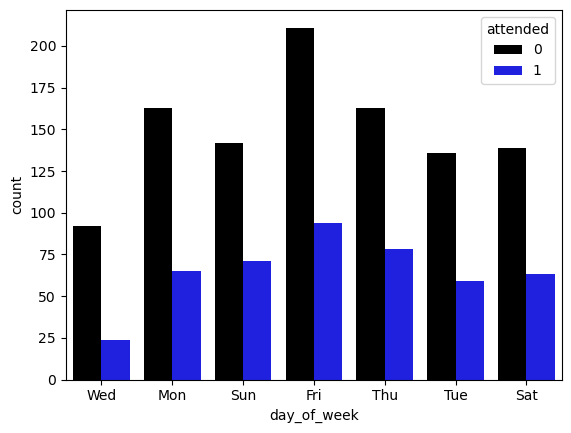

In [24]:
sns.countplot(x='day_of_week', hue='attended', data=df, palette={1: 'blue', 0: 'black'});

As I mentioned above, members count assigned for classes on friday is higher therefore, attendance on friday is higher than all other week days.

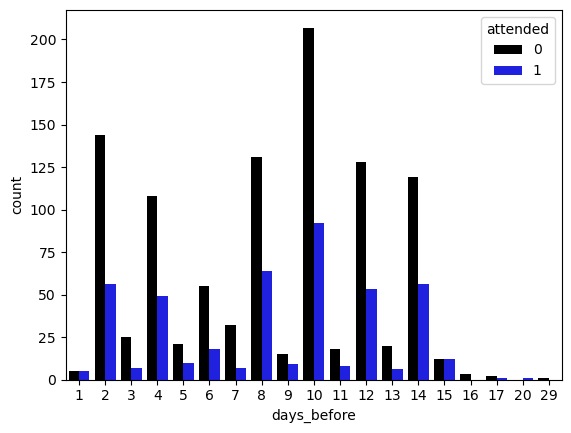

In [25]:
sns.countplot(x='days_before', hue='attended', data=df, palette={1: 'blue', 0: 'black'});

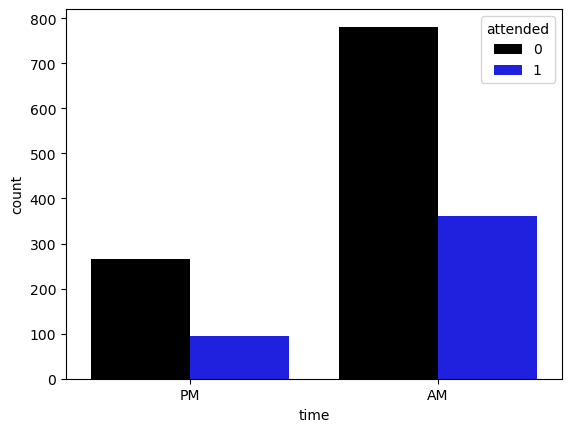

In [26]:
sns.countplot(x='time', hue='attended', data=df, palette={1: 'blue', 0: 'black'});

This graph shows that most of the club members did not attend classes but those who join or attend, are attending mostly at morning 

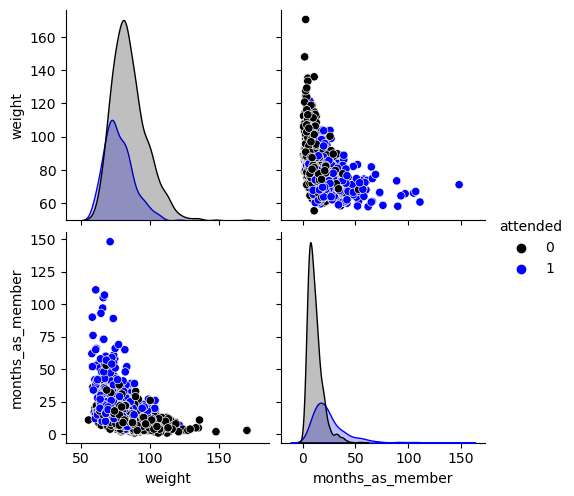

In [27]:
sns.pairplot(df, vars=['weight', 'months_as_member'], hue='attended', palette={1: 'blue', 0: 'black'});

1. First graph shows that weight of those members who are attending classes is less then those who are not taking classes.
2. second and third graph shows that also months count after joined club has impact on weights of members. Those which are taking classes from more months have less weight.
3. Last graph shows that those members who are taking classes from more months have less weight.

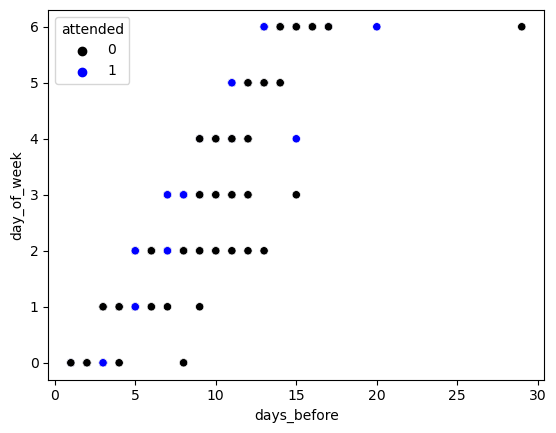

In [28]:
# days mapping
day_mapping = { 'Mon':0, 'Tue': 1, 'Wed': 2, 'Thu':3, 'Fri':4, 'Sat':5,  'Sun':6}
df['day_of_week'] = df['day_of_week'].apply(lambda x: day_mapping[x])

ax = sns.scatterplot(df, x='days_before', y='day_of_week', hue='attended', palette={1: 'blue', 0: 'black'});

This graph shows that days_before column and day_of_week have strong corelation.
It means the members who registered for class early or has large value for days_before are assigned last days of week (weekend) for classes.
It means early registered members are prefered for classes on weekend.

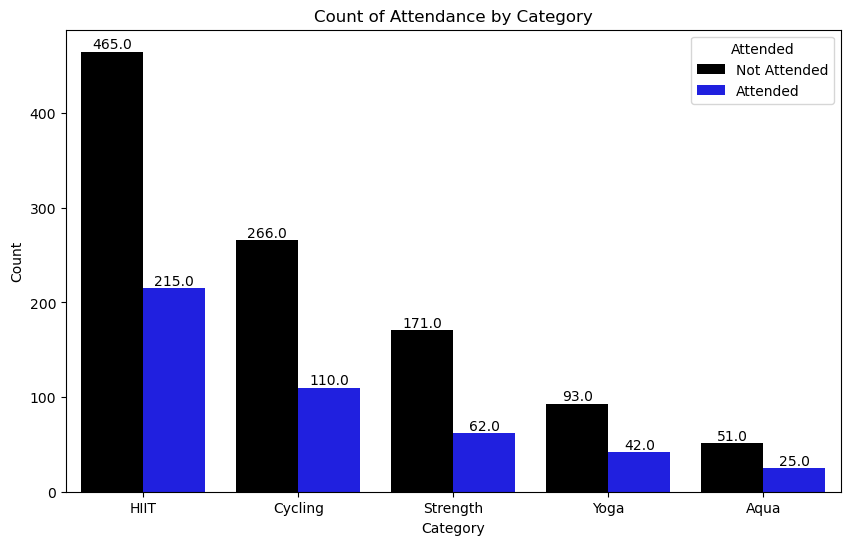

In [29]:
# Calculate the counts for each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize =(10,6))
# Create the countplot
ax = sns.countplot(data=df, x='category', hue='attended', order=category_counts['category'], palette={1: 'blue', 0: 'black'})

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Attendance by Category')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show()

- Above graph shows the number of members of every category which are attending and which are not attending classes.
- Also the HIIT has the most observations as 213 for class attended.

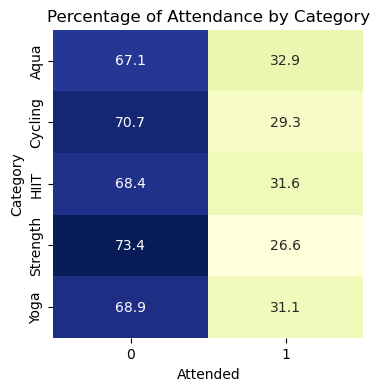

In [30]:
# Create a cross-tabulation with percentage values
cross_tab = pd.crosstab(df['category'], df['attended'], normalize='index') * 100

# Create a heatmap using seaborn
plt.figure(figsize=(4, 4))
ax=sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='.1f', cbar=False)
plt.xlabel('Attended')
plt.ylabel('Category')
plt.title('Percentage of Attendance by Category')
plt.show()

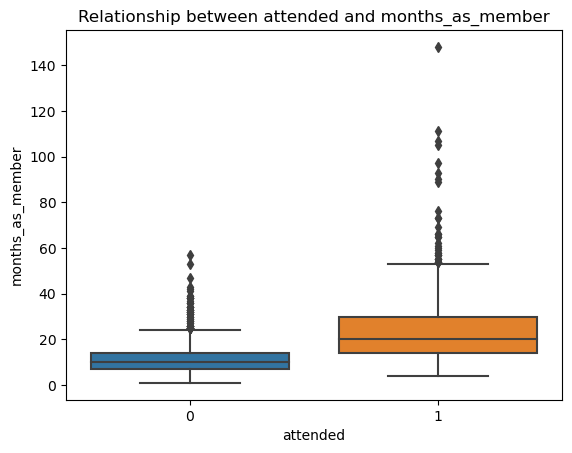

In [31]:
ax2=sns.boxplot(data=df,y="months_as_member",x="attended")
plt.title("Relationship between attended and months_as_member")
plt.show()  

First we made a box plot to see the relationship between the two variables months_as_member and attemded, however it is observed that there are many outliers which makes the graph does not display well and distorts the mean values. So we decided to eliminate the outliers. After elimination it shows that the average of the people who attend the classes have more than 15 months of membership (on average), while those who do not attend the classes have an average of 10 months of membership. This can give us an idea that people who have been members for some time are more committed and attend the classes they book.

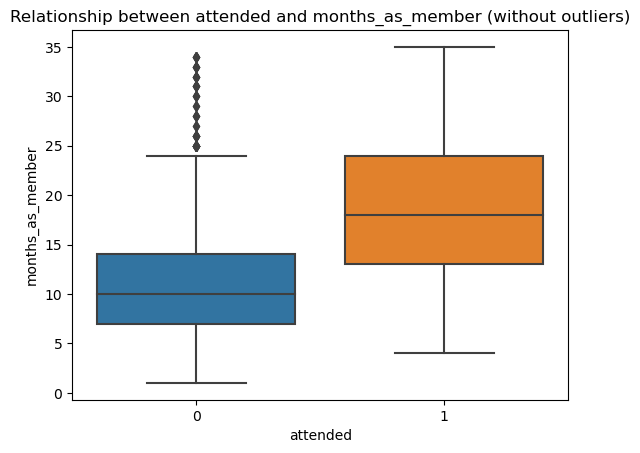

In [32]:
# Remove Outlier

# Calculate the IQR
Q1 = df['months_as_member'].quantile(0.25)
Q3 = df['months_as_member'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_new = df[(df['months_as_member'] >= lower_bound) & (df['months_as_member'] <= upper_bound)]

ax3=sns.boxplot(data=df_new,y="months_as_member",x="attended")
plt.title("Relationship between attended and months_as_member (without outliers)")
plt.show()

Post removal of outliers, we can infer that:
- Those who attended has higher Q1, median and Q3 than who did not attend.
- The data indicates skewed towards right

In [33]:
# Time mapping
time_mapping = {'AM': 0, 'PM': 1}
df_new['time'] = df_new['time'].apply(lambda x: time_mapping[x])

# Category mapping
category_mapping = {'HIIT': 0, 'Cycling': 1, 'Strength': 2, 'Yoga': 3, 'Aqua': 4}
df_new['category'] = df_new['category'].apply(lambda x: category_mapping[x])

df_new.head()


,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,2,1,2,0
1,10,79.01,2,0,0,0,0
2,16,74.53,14,6,0,2,0
3,5,86.12,10,4,0,1,0
4,15,69.29,8,3,0,0,0


**2. Correlation Heatmap:**
Objective: Explore Relationships Between Variables

Explanation:
A correlation heatmap is a visual representation of the correlation matrix. It helps answer questions like:

- Which variables are strongly correlated?
- Are there any unexpected correlations between variables?
- How does the correlation structure change?
Interpretation:

Strong positive correlations (values close to 1) suggest that as one variable increases, the other tends to increase.
Strong negative correlations (values close to -1) suggest that as one variable increases, the other tends to decrease.
Weak correlations (values close to 0) suggest a lack of linear relationship.

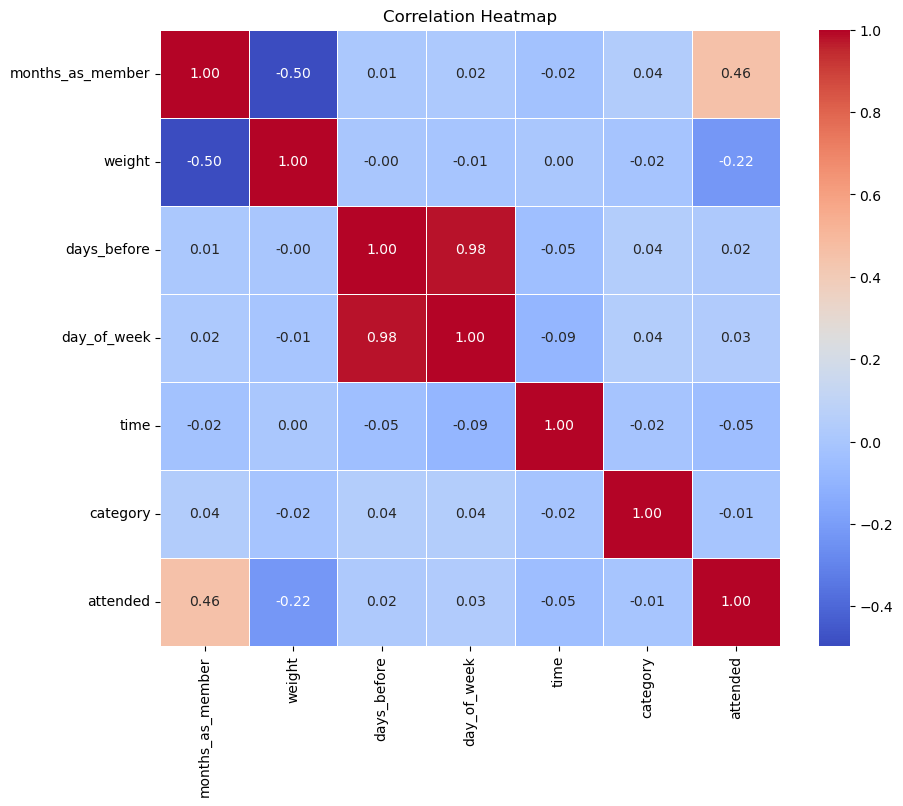

In [34]:
correlation_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
ax=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Now, for furthur processing and model training data is splitted into two parts training part and testing one.

In [35]:
np.random.seed(40)
x_train,x_test,y_train,y_test=train_test_split(df_new.drop('attended',axis=1), df_new['attended'],test_size=0.2,stratify=df_new['attended'])

**Baseline Model - Logistic Regression Classifier**

Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict the probability that an instance belongs to a particular class.

In [36]:
regression_model = LogisticRegression()
regression_model.fit(x_train, y_train);

**Comparision Model - Random Forest Classifier**

Random Forest is an ensemble machine learning algorithm that operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It is a powerful and versatile technique known for its high accuracy and robustness. 

In [37]:
RFCL = RandomForestClassifier(n_estimators = 100, random_state=1)
RFGL = RFCL.fit(x_train, y_train);

Why I chose the models?

- I have opted for the Logistic Regression model as a baseline choice due to its simplicity, efficiency in training, and ease of interpretation.

- As a comparison, I have decided to implement the Random Forest model. This choice is driven by the Random Forest's capability to capture intricate relationships between input features and target variables, making it well-suited for handling more complex data patterns.

**Model Evaluation Parameters:**

Based on the specific task of predicting attendance in fitness classes, I have considered Precision, Recall, and F1-Score.

Precision, Recall, and F1-Score are essential evaluation metrics, especially when dealing with imbalanced classes

0.7857142857142857


<Axes: >

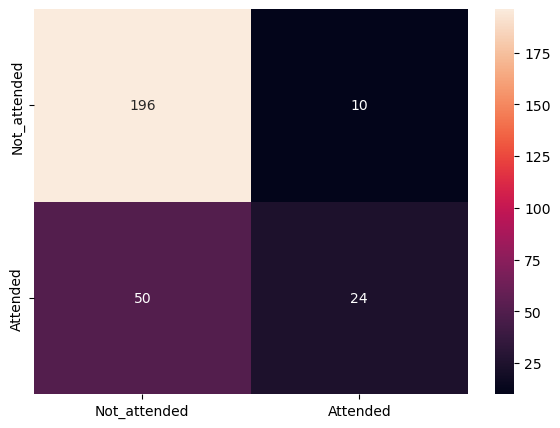

In [38]:
#For Logistic Regression Classifier
np.random.seed(40)
y_predict = regression_model.predict(x_test)
print(regression_model.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Not_attended","Attended"]],
                  columns = [i for i in ["Not_attended","Attended"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='.3g')

In [39]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7058823529411765
Recall: 0.32432432432432434
F1-Score: 0.44444444444444453


0.7535714285714286


<Axes: >

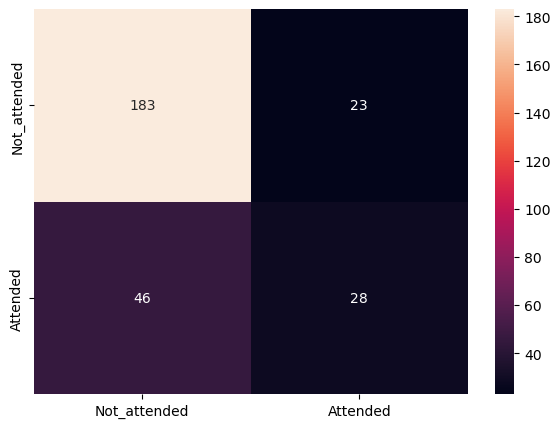

In [40]:
#For Random Forrest Classifie
np.random.seed(40)
y_predict = RFCL.predict(x_test)
print(RFCL.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Not_attended","Attended"]],
                  columns = [i for i in ["Not_attended","Attended"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='.3g')

In [41]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5490196078431373
Recall: 0.3783783783783784
F1-Score: 0.448


In [42]:
param_RFCL_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_LR_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

**Choosing optimal hyperparameters for a model.**

Grid Search Cross-Validation (GridSearchCV) is a technique used in machine learning to find the optimal hyperparameters for a model. Hyperparameters are parameters that are not learned from the data but are set prior to training a model

In [43]:
grid_search_LR = GridSearchCV(estimator=regression_model, param_grid=param_LR_grid, cv=5, scoring='accuracy')

In [44]:
grid_search_RFCL = GridSearchCV(estimator=RFCL, param_grid=param_RFCL_grid, cv=3, scoring='accuracy')

In [45]:
np.random.seed(40)
grid_search_RFCL.fit(x_train, y_train);
grid_search_LR.fit(x_train, y_train);

By optimizing hyperparameters, GridSearchCV aims to improve the model's performance in terms of metrics like accuracy, precision, recall, or other relevant measures, depending on the specific problem.

In [46]:
print("Best Parameters LR: ", grid_search_LR.best_params_)
print("Best Accuracy LR: {:.2f}".format(grid_search_LR.best_score_))
print("Best Parameters LR: ", grid_search_RFCL.best_params_)
print("Best Accuracy LR: {:.2f}".format(grid_search_RFCL.best_score_))

Best Parameters LR:  {'C': 0.001}
Best Accuracy LR: 0.77
Best Parameters LR:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy LR: 0.79


As the models are trained now we can find which columns or features of the dataset are more importent in prediction. Below is the feature importance done by RandomForestClassifier 

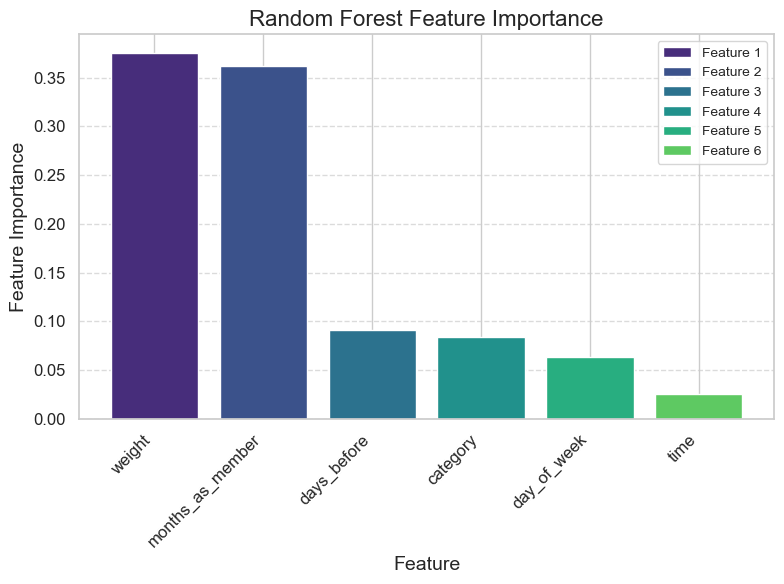

In [47]:
feature_importances = RFCL.feature_importances_

# Get feature names
feature_names = df.columns

indices = np.argsort(feature_importances)[::-1]

# Set style using seaborn
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", len(feature_names))

# Plot the feature importances
plt.figure(figsize=(8, 6))
bars = plt.bar(range(x_train.shape[1]), feature_importances[indices], color=palette)
plt.xticks(range(x_train.shape[1]), np.array(feature_names)[indices], rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.title("Random Forest Feature Importance", fontsize=16)

# Add a legend
plt.legend(bars, ["Feature {}".format(i+1) for i in range(len(feature_names))], loc="upper right", fontsize=10)

# Add a grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Hence the final conclusion is that weight column is most important in prediction then months_as-member and so on.